# Wykorzystanie metody Monte Carlo        do estymacji wartości liczby pi 


## Natalia Kubańska IIAD 

### Import bibliotek

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
np.random.seed(101)

### Implementacja funkcji 

##### Funckja odpowiedzialna za generowanie N punktów z rozkładu równomiernego w zależności od parametru **number_of_points**

In [3]:
def generate_Points(number_of_points = 1000):
    x = np.random.uniform(0, 1, number_of_points)
    y = np.random.uniform(0, 1, number_of_points)
    return x,y 

##### Funkcja sprawdzająca czy punkt leży wewnątrz ćwiartki koła

In [4]:
def isInsideCircle(x,y):
    return y <= np.sqrt(1 - x**2)

##### Funkcja estymująca wartość pi 
Wykorzystuje maskę którą jest output z funkcji isInsideCircle() - informacja czy punkt leży wewnątrz koła

In [5]:
def calculatePI(mask):
    return round( sum(mask) / len(mask) * 4, 4) 

##### Funkcja ilustrująca jak losowane są punkty z zaznaczeniem tych leżących pod wykresem oraz nad wykresem


In [6]:
def drawCircle(x, y, mask, ax, title):
    circle_x = np.linspace(0, 1, 1000)
    circle_y = np.sqrt(1 - circle_x**2)
    
    colors = np.where(mask, 'blue', 'red')
    prop = calculatePI(mask)
    
    ax.plot(circle_x, circle_y, color='blue')
    ax.scatter(x, y, color=colors, s=1)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1) 
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)

    ax.grid(True)
    ax.legend([f"PI = {prop:.4f}"], loc=3)

### Wykresy ilustrują jak losowane są punkty dla 100, 1000, 10000, 100000 N

Text(0.5, 0.98, 'Losowe X Y')

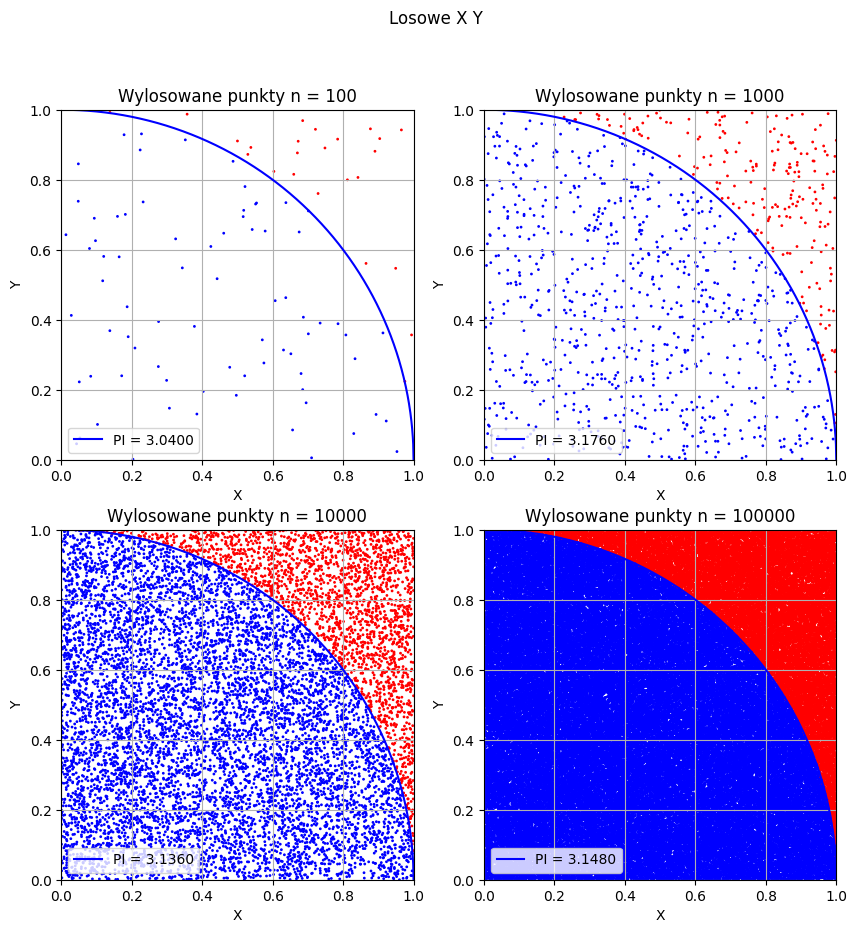

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten() 

points_counts = [100, 1000, 10000, 100000]

for ax, n in zip(axs, points_counts):
    x, y = generate_Points(n)
    mask = isInsideCircle(x, y)
    drawCircle(x, y, mask, ax, f'Wylosowane punkty n = {n}')
 
fig.suptitle('Losowe X Y')

### Dążenie estymacji liczby pi  wraz ze zwrostem liczby punktów dla 10 serii 

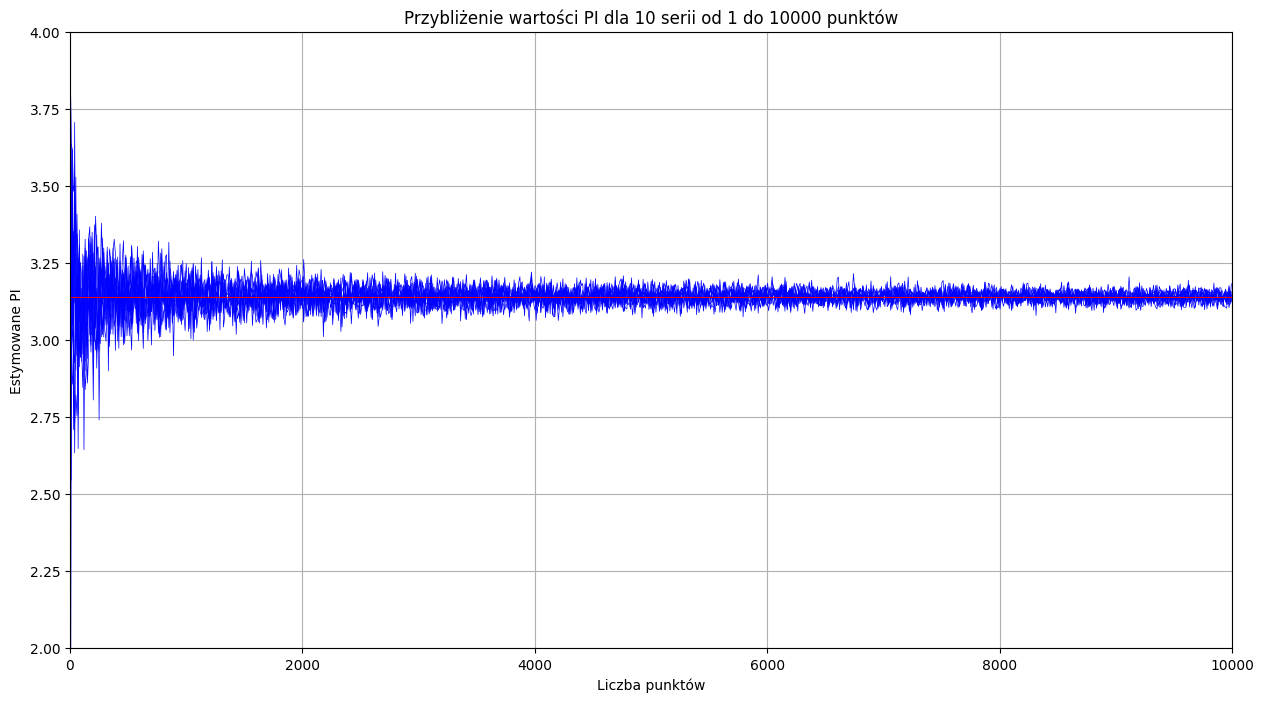

In [8]:
numbers_range = range(1, 10001, 10)
pi_series_values = []

for _ in range(10):  
    pi_values_temp = []
    for n in numbers_range:
        x, y = generate_Points(n)
        mask = isInsideCircle(x, y)
        pi_estimate = calculatePI(mask)
        pi_values_temp.append(pi_estimate)
    pi_series_values.append(pi_values_temp)
    

plt.figure(figsize=(15, 8))
for i, series in enumerate(pi_series_values):
    plt.plot(numbers_range, series, color = 'blue', lw = 0.5)
    
plt.axhline(np.pi, color='red', lw = 0.7)
plt.xlim(0,10000)
plt.ylim(2,4)
plt.xlabel('Liczba punktów')
plt.ylabel('Estymowane PI')
plt.title('Przybliżenie wartości PI dla 10 serii od 1 do 10000 punktów')
plt.grid(True)

### Średni błąd estymacji wartości PI w zależności od liczby punktów  10, 100, 1000, 10000, 100000, 1000000

Text(0.5, 1.0, 'Średni błąd estymacji wartości PI w zależności od liczby punktów')

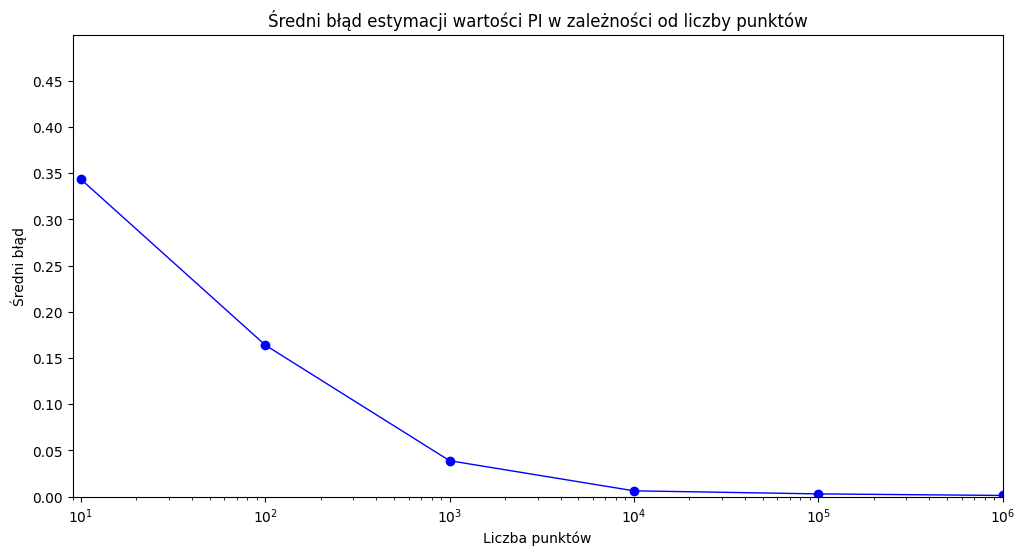

In [9]:
points_counts = [ 10, 100, 1000, 10000, 100000, 1000000]

pi_estimates_series = {n: [] for n in points_counts}  

for _ in range(10):
    for n in points_counts:
        x, y = generate_Points(n)
        mask = isInsideCircle(x, y)
        pi_estimate = calculatePI(mask)
        pi_estimates_series[n].append(pi_estimate)

mean_errors = []
for n in points_counts:
    errors = [abs(pi_estimate - np.pi) for pi_estimate in pi_estimates_series[n]]
    mean_errors.append(np.mean(errors))


plt.figure(figsize=(12, 6))
plt.plot(points_counts, mean_errors, marker='o', color='blue', lw=1)
plt.xscale('log')  
plt.xlabel('Liczba punktów')
plt.ylim(0,0.5)
plt.yticks(np.arange(0,0.5, 0.05))
plt.xlim(9, 1000010)
plt.ylabel('Średni błąd')
plt.title('Średni błąd estymacji wartości PI w zależności od liczby punktów')



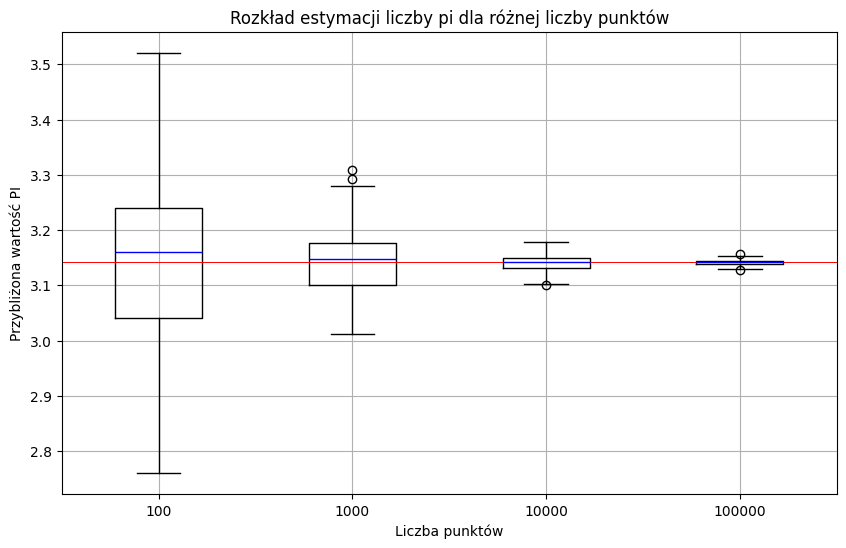

In [10]:
numbers = [100, 1000, 10000, 100000]

pi_values = {n: [] for n in numbers}

for n in numbers:
    for _ in range(100):
        x, y = generate_Points(n)
        mask = isInsideCircle(x, y)
        pi_estimate = calculatePI(mask)
        pi_values[n].append(pi_estimate)

plt.figure(figsize=(10, 6))
box = plt.boxplot([pi_values[n] for n in numbers], medianprops = dict(color = "blue"))
plt.xticks(ticks=[1, 2, 3, 4], labels=[100, 1000, 10000, 100000])
plt.axhline(np.pi, color='red', lw = 0.7)
plt.xlabel('Liczba punktów')
plt.ylabel('Przybliżona wartość PI')
plt.title('Rozkład estymacji liczby pi dla różnej liczby punktów')
plt.grid(True)

### Mediany dla różnej liczby punktów

In [11]:
median_values = [line.get_ydata()[0] for line in box['medians']]
for med_val in median_values:
    print(med_val)

3.16
3.148
3.1424
3.14175


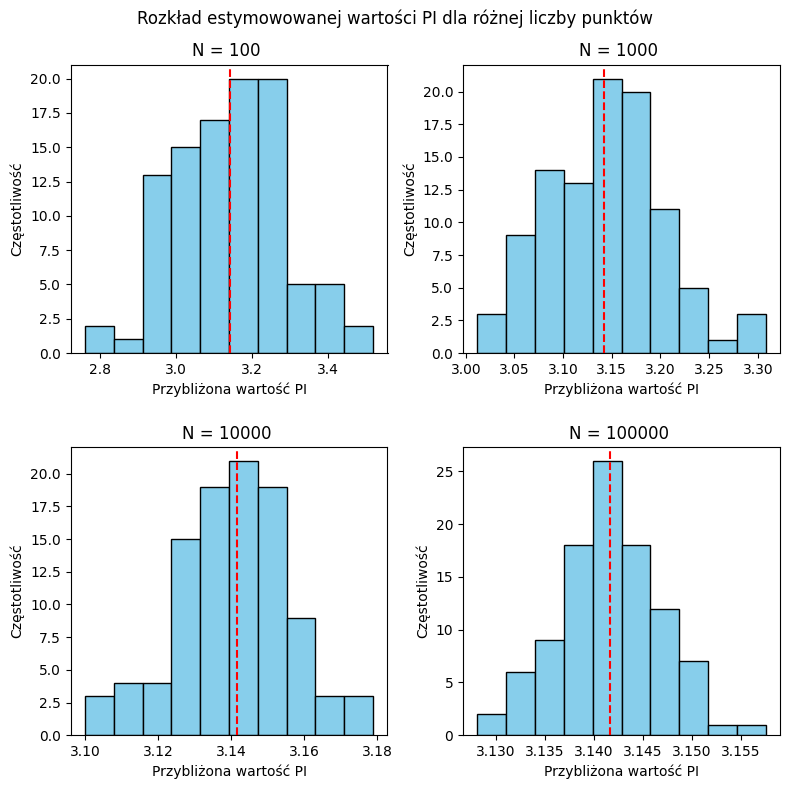

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8)) 

for ax, n in zip(axs.flatten(), numbers):
    ax.hist(pi_values[n], color='skyblue', edgecolor='black')
    ax.axvline(x=np.pi, color='red', linestyle='--')
    ax.set_title(f'N = {n} ')
    ax.set_xlabel('Przybliżona wartość PI')
    ax.set_ylabel('Częstotliwość')
    
fig.suptitle('Rozkład estymowowanej wartości PI dla różnej liczby punktów')
plt.tight_layout(h_pad = 2)    

## Wnioski

**Wraz ze zwrostem liczby punktów estymowana wartość pi jest coraz dokładniejsza.      
Dodatkowo możemy zaobserować zmniejszającą się rozpiętość danych - coraz niższa szansa na trafienie wartości sporo odstającej od pi.      
Średni błąd estymacji jest poniżej 0.05 dla liczby punktów >= 1000.      
Dodatkowo mediana jest bliska pi także od 1000 obserwacji.        
Podsumowywując, biorą pod uwagę jak prezentuje się rozkład estymowowanych wartości oraz średni bład moim zdaniem od liczby punktów 10000 estymowana wartość nie poprawia się znacząco. Największy wzrost dokładności możemy zaobserować właśnie do tej liczby punktów. Jeśli zależy nam na balansie pomiędzy złożonością obliczeniową, a satyskacjonującym wynikiem może okazać się dobrym wyborem.**



